In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


Load Dataset

In [ ]:
df = pd.read_csv('/content/Tweets.csv')

Keep only relevant columns and labels

In [ ]:
df = df[['text', 'airline_sentiment']]
df = df[df['airline_sentiment'].isin(['positive', 'negative', 'neutral'])]
df['label'] = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

TF-IDF vectorization

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Train a Logistic Regression model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

Predictions

In [ ]:
y_pred = model.predict(X_test_vec)

Evaluation

In [ ]:
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))


              precision    recall  f1-score   support

    negative       0.76      0.89      0.82      1017
     neutral       0.62      0.51      0.56       459
    positive       0.77      0.54      0.64       355

    accuracy                           0.73      1831
   macro avg       0.71      0.65      0.67      1831
weighted avg       0.72      0.73      0.72      1831



Confusion matrix

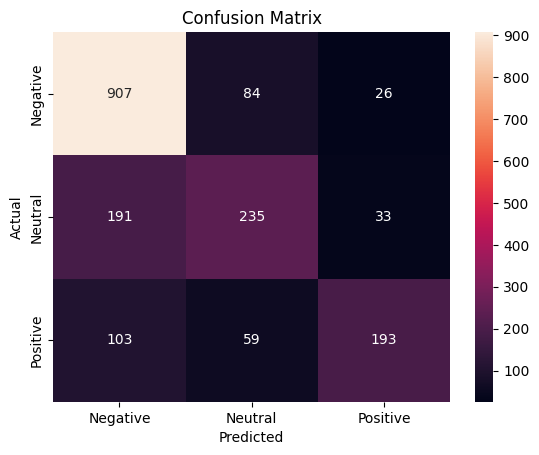

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
sample = ["I had the worst flight ever. Delayed and rude crew."]
sample_vec = vectorizer.transform(sample)
pred = model.predict(sample_vec)
print("Predicted Sentiment:", ['negative', 'neutral', 'positive'][pred[0]])

Predicted Sentiment: negative


List of new tweet examples to predict

In [ ]:
sample_tweets = [
    "I love flying with Southwest! Best service ever!",
    "My flight was delayed for 3 hours and no apology. Unacceptable.",
    "I'm not sure how I feel about that flight, it was just okay.",
    "Delta Airlines made my day with their friendly staff!",
    "This was the worst experience I’ve had in an airport.",
    "Thanks United for getting me to my destination on time.",
    "Flight attendants were fine, but the seats were so uncomfortable.",
    "American Airlines, why do you keep losing my luggage?",
    "The plane was clean and the takeoff was smooth.",
    "Cancelled my flight last minute with no explanation. Never again."
]

 Transform text using trained TF-IDF vectorizer

In [ ]:
sample_vec = vectorizer.transform(sample_tweets)

Predict sentiment

In [ ]:
predictions = model.predict(sample_vec)

Map predictions to labels

In [ ]:
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}


Print predictions

In [ ]:
for tweet, pred in zip(sample_tweets, predictions):
    print(f"Tweet: {tweet}\nPredicted Sentiment: {label_map[pred]}\n")


Tweet: I love flying with Southwest! Best service ever!
Predicted Sentiment: positive

Tweet: My flight was delayed for 3 hours and no apology. Unacceptable.
Predicted Sentiment: negative

Tweet: I'm not sure how I feel about that flight, it was just okay.
Predicted Sentiment: negative

Tweet: Delta Airlines made my day with their friendly staff!
Predicted Sentiment: negative

Tweet: This was the worst experience I’ve had in an airport.
Predicted Sentiment: negative

Tweet: Thanks United for getting me to my destination on time.
Predicted Sentiment: positive

Tweet: Flight attendants were fine, but the seats were so uncomfortable.
Predicted Sentiment: negative

Tweet: American Airlines, why do you keep losing my luggage?
Predicted Sentiment: negative

Tweet: The plane was clean and the takeoff was smooth.
Predicted Sentiment: negative

Tweet: Cancelled my flight last minute with no explanation. Never again.
Predicted Sentiment: negative

